In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import os
import pandas as pd
from scipy import optimize
from scipy.optimize import Bounds
from scipy.optimize import minimize

In [2]:
# read transformer's prediction, remove first two elements
data = np.loadtxt('planter_8_inference.txt')
data = data[2:]

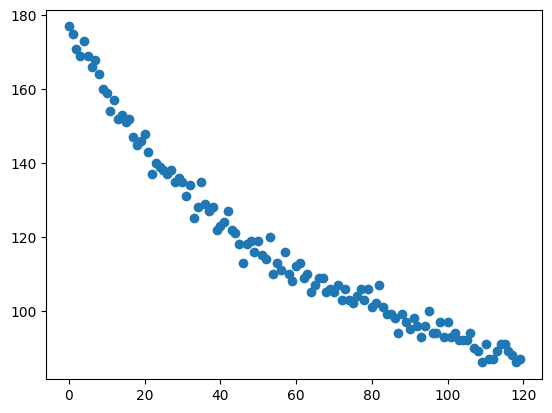

In [3]:
x = range(120)
plt.scatter(x, data[100])

In [4]:
# curve fit model
def exponential_model(x, a, b, c):
    return a*np.exp(-b*x) + c

In [16]:
def prediction_regression(data_list):
    x = range(0, 120)
    params, covariance = curve_fit(exponential_model, x, data_list/100)
    return params

In [33]:
a, b, c = prediction_regression(data[100])

In [34]:
x=range(0, 120)
y_fitted = exponential_model(x, a, b, c)

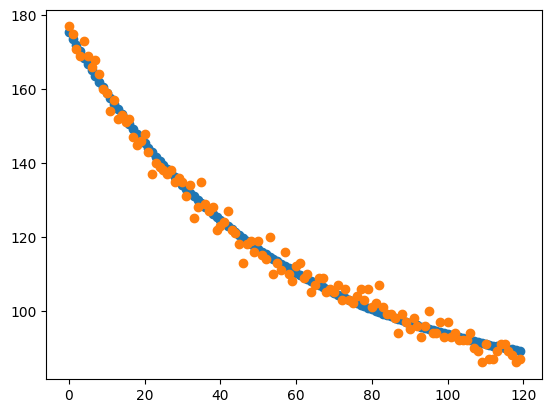

In [35]:
plt.scatter(x, y_fitted * 100)
plt.scatter(x, data[100])

In [ ]:
# for i in range(740):
#     a, b, c = prediction_regression(data[i])
#     y_fitted = exponential_model(x, a, b, c)
#     plt.scatter(x, y_fitted, label='fit')
#     plt.scatter(x, data[i]/100, label='data')
#     plt.legend()
#     plt.show()

In [10]:
# load ground truth
csv_path = './layer_8/'
all_files = os.listdir(csv_path)
csv_files = [file for file in all_files if file.endswith('.csv')]
sorted_csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[0]))
ground_truth = []
ground_truth_filename = []
for file in sorted_csv_files:
    ground_truth_filename.append(file)
    file_path = os.path.join(csv_path, file)
    df = pd.read_csv(file_path, header=None)[0].tolist()
    ground_truth.append(df[:120])
ground_truth = ground_truth[1:]
ground_truth = np.array(ground_truth)

In [ ]:
# for i in range(len(ground_truth)):
#     a, b, c = prediction_regression(data[i])
#     y_fitted = exponential_model(x, a, b, c)
#     plt.scatter(x, y_fitted, label='fit')
#     plt.scatter(x, data[i]/100, label='data')
#     plt.scatter(x, ground_truth[i]/100, label='ground_truth')
#     plt.legend()
#     plt.show()

In [87]:
def objective(t):
    T_b = 135
    func = 0
    for i in range(742):
        a, b, c = prediction_regression(data[i])
        func += (exponential_model(t, a, b, c)*100 - T_b) ** 2
    func += t
    return func

In [88]:
t_l_list = []
t_u_list = []
for i in range(742):
    a, b, c = prediction_regression(data[i])
    t_l = -1
    t_u = -1
    for t in range(0 + 1, 120 - 1):
        if exponential_model(t-1, a, b, c)*100 > 150 and exponential_model(t, a, b, c)*100 <= 150 and t_l == -1:
            t_l_list.append(t)
        if exponential_model(t, a, b, c)*100 >= 120 and exponential_model(t + 1, a, b, c)*100 < 120 and t_u == -1:
            t_u_list.append(t)

In [89]:
lb = min(t_l_list)
ub = max(t_u_list)

In [90]:
bounds = Bounds(lb, ub)

In [91]:
x0 = np.array([np.random.uniform(lb, ub)])

In [92]:
res = minimize(objective, x0, method='SLSQP', options={'ftol': 1e-9, 'disp': True}, bounds=bounds)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1116.5014946009574
            Iterations: 7
            Function evaluations: 15
            Gradient evaluations: 7


In [93]:
res.x

array([27.90717591])

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import Bounds
from scipy.optimize import minimize

In [2]:
def exponential_model(x, a, b, c):
    """curve fit model"""
    return a*np.exp(-b*x) + c

In [3]:
def prediction_regression(data_list):
    """regression for the transformer's output, to avoid overflow, divide input by 100"""
    x = range(len(data_list))
    params, covariance = curve_fit(exponential_model, x, data_list/100.0)
    return params

In [4]:
def objective(t, T_b, num_points, data, w_0=1, w_1=1):
    func = 0
    for i in range(num_points):
        a, b, c = prediction_regression(data[i])
        func += w_1 * (exponential_model(t, a, b, c)*100 - T_b) ** 2
    func += w_0 * t
    return func

In [6]:
data = np.loadtxt('planter_8_inference.txt')
data = data[2:]
num_points = len(data)

In [21]:
T_l = 80
T_u = 140
min_list = []
max_list = []
for i in range(num_points):
    a, b, c = prediction_regression(data[i])
    t_list = []
    for t in range(1, len(data[i])-1):
        print(len(data[i]))
        if T_l <= exponential_model(t, a, b, c) * 100 <= T_u:
            t_list.append(t)
    min_list.append(min(t_list))
    max_list.append(max(t_list))

120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120


In [19]:
print(max(min_list))
print(min(max_list))

34
118


In [20]:
lb, ub = 34, 118
bounds = Bounds(lb, ub)
T_b = 110
x0 = np.array([np.random.uniform(lb, ub)])
res = minimize(objective, x0, method='SLSQP', args=(T_b, num_points, data), options={'ftol': 1e-9, 'disp': True}, bounds=bounds)
print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1864.4083559390187
            Iterations: 9
            Function evaluations: 19
            Gradient evaluations: 9
[58.70342214]


In [67]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import Bounds
from scipy.optimize import minimize


def exponential_model(x, a, b, c):
    """curve fit model"""
    return a*np.exp(-b*x) + c


def prediction_regression(data_list):
    """regression for the transformer's output, to avoid overflow, divide input by 100"""
    x = range(len(data_list))
    params, covariance = curve_fit(exponential_model, x, data_list/100.0)
    return params


def objective(t, T_b, num_points, data, w_0=700, w_1=1):
    func = 0
    for i in range(num_points):
        a, b, c = prediction_regression(data[i])
        func += w_1 * (exponential_model(t, a, b, c)*100 - T_b) ** 2
    func += w_0 * t
    return func


def find_lb_ub(num_points, data, T_l=80, T_u=140):
    t_l_list = []
    t_u_list = []
    for i in range(num_points):
        a, b, c = prediction_regression(data[i])
        t_list = []
        for t in range(len(data[i])):
            if T_l <= exponential_model(t, a, b, c) * 100 <= T_u:
                t_list.append(t)
        t_l_list.append(min(t_list))
        t_u_list.append(max(t_list))
        return max(t_l_list), min(t_u_list)


def run_optimization(data_file):
    data = np.loadtxt(data_file)
    data = data[2:]
    num_points = len(data)
    lb, ub = find_lb_ub(num_points, data)
    print(f'lb, ub: {lb}, {ub}')
    bounds = Bounds(lb, ub)
    T_b = 110
    x0 = np.array([np.random.uniform(lb, ub)])
    res = minimize(objective, x0, method='SLSQP', args=(T_b, num_points, data), options={'ftol': 1e-9, 'disp': True},
                   bounds=bounds)
    return res.x


if __name__ == '__main__':
    planters_x = run_optimization('./Inference_source/planters_inference.txt')
    print(f'Planters: {planters_x}')
    table_x = run_optimization('./Inference_source/table_inference.txt')
    print(f'Table: {table_x}')
    totems_x = run_optimization('./Inference_source/totems_inference.txt')
    print(f'Totems: {totems_x}')


lb, ub: 28, 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52485.278313837305
            Iterations: 8
            Function evaluations: 17
            Gradient evaluations: 8
Planters: [64.0784389]
lb, ub: 33, 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 59957.81679013097
            Iterations: 8
            Function evaluations: 17
            Gradient evaluations: 8
Table: [81.68740849]
lb, ub: 19, 119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 27784.787470781164
            Iterations: 7
            Function evaluations: 16
            Gradient evaluations: 7
Totems: [37.01288287]


In [26]:
def exponential_model(x, a, b, c):
    """curve fit model"""
    return a*np.exp(-b*x) + c

def prediction_regression(data_list):
    """regression for the transformer's output, to avoid overflow, divide input by 100"""
    x = range(len(data_list))
    params, covariance = curve_fit(exponential_model, x, data_list/100.0)
    return params

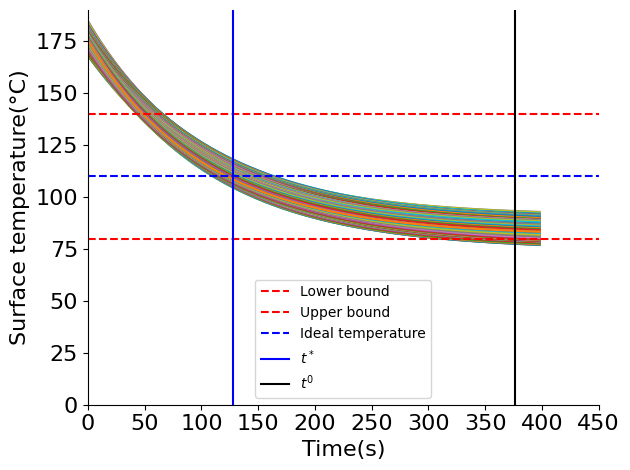

In [66]:
data = np.loadtxt('./Inference_source/planters_inference.txt')
data = data[2:]
num_points = len(data)
profile_list = []
for i in range(num_points):
    a, b, c = prediction_regression(data[i])
    profile = []
    for t in range(200):
        profile.append(exponential_model(t, a, b, c) * 100)
    profile_list.append(profile)
for profile in profile_list:
    plt.plot(profile)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim(0,205)
plt.ylim(0,190)
locs, labels = plt.xticks()

plt.xticks(locs, [int(loc * 2) for loc in locs])

plt.xlabel('Time(s)', fontsize=16)
plt.ylabel('Surface temperature(°C)', fontsize=16)
plt.axhline(y=80, color='red', linestyle='--', label='Lower bound')
plt.axhline(y=140, color='red', linestyle='--', label='Upper bound')
plt.axhline(y=110, color='blue', linestyle='--', label='Ideal temperature')
plt.axvline(x=64.08, color='blue', linestyle='-', label=r'$t^*$')
plt.axvline(x=188, color='black', linestyle='-', label=r'$t^0$')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig('planters_all_profile.png')
plt.show()